In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("combats.csv")
df

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


In [4]:
dfpk=pd.read_csv("pokemon.csv")
dfpk

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [5]:
dfpk.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [6]:
dfpk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [7]:
dfpk.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [9]:
dfpk.corr(numeric_only=True)

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


In [10]:
dfpk.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

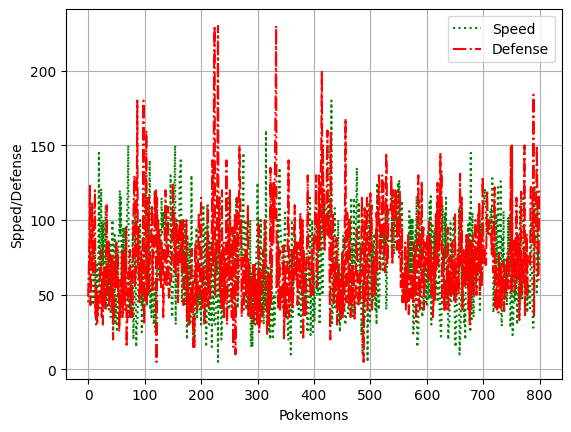

In [23]:
#lineplot
plt.plot(dfpk["Speed"],label='Speed',linestyle=':',color='g')
plt.plot(dfpk["Defense"],label='Defense',linestyle='-.',color='r')
plt.xlabel('Pokemons')
plt.grid()
plt.ylabel('Spped/Defense')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Attack Defense Scatterplot')

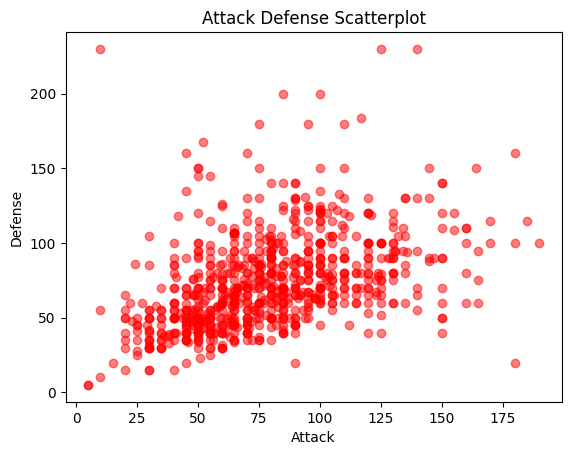

In [26]:
#scatterplot
plt.scatter(dfpk['Attack'],dfpk['Defense'],color='r',alpha=0.5)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack Defense Scatterplot')

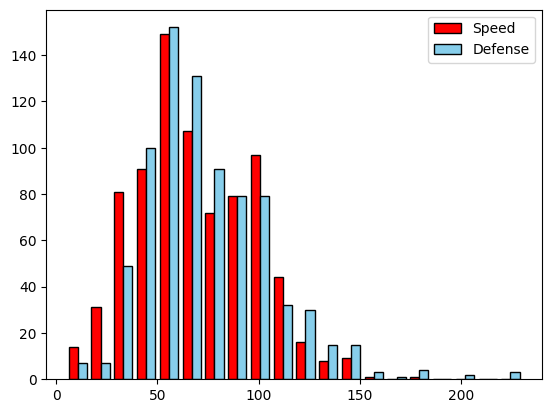

In [34]:
#histogram
plt.hist(dfpk[['Speed','Defense']],bins=20,label=['Speed','Defense'],color=['r','skyblue'],edgecolor='black')
plt.legend()
plt.show()


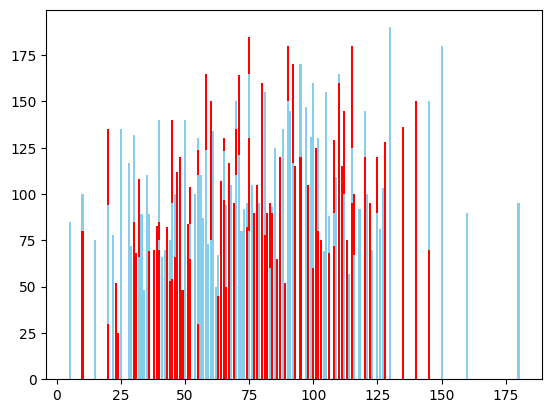

In [46]:
#barplot
plt.bar(dfpk['Speed'],dfpk['Attack'],color=['r','skyblue'])
plt.show()

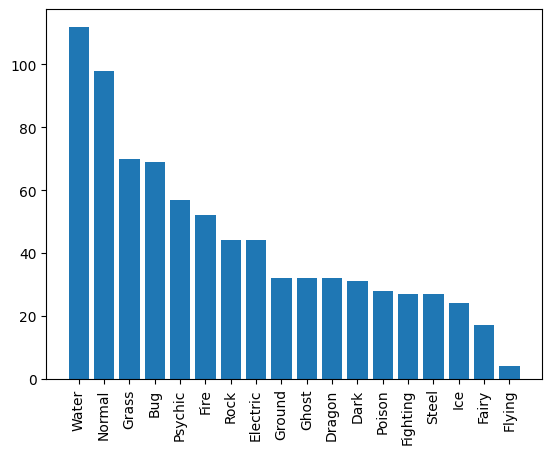

In [52]:
count=dfpk['Type 1'].value_counts()
plt.bar(count.index,count.values)
plt.xticks(rotation=90)
plt.show()

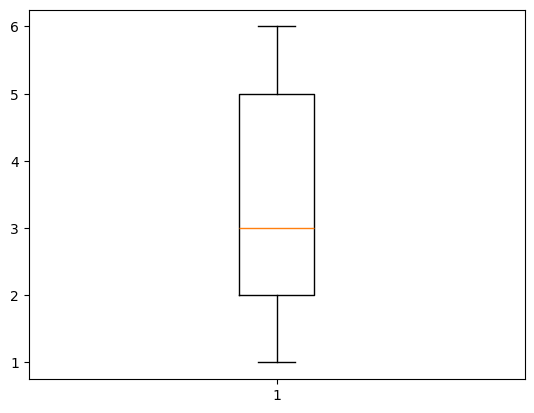

In [50]:
#boxplot
plt.boxplot(dfpk['Generation'])
plt.show()

([<matplotlib.patches.Wedge at 0x2b4f3724050>,
 [Text(1.112922071741188, 0.8493553215417575, '1'),
  Text(-0.4089501810066604, 1.0211560847659968, '5'),
  Text(-1.0958974251342508, -0.09491487546280211, '3'),
  Text(-0.40895012419334376, -1.0211561075184583, '4'),
  Text(0.537483119000668, -0.9597457459084223, '2'),
  Text(1.0434603952980672, -0.34812412074488824, '6')],
 [Text(0.7154499032621922, 0.546014135276844, '20.8%'),
  Text(-0.22306373509454203, 0.5569942280541801, '20.6%'),
  Text(-0.5977622318914095, -0.05177175025243751, '20.0%'),
  Text(-0.2230637041054602, -0.5569942404646135, '15.1%'),
  Text(0.2931726103640007, -0.5234976795864121, '13.2%'),
  Text(0.5691602156171275, -0.1898858840426663, '10.2%')])

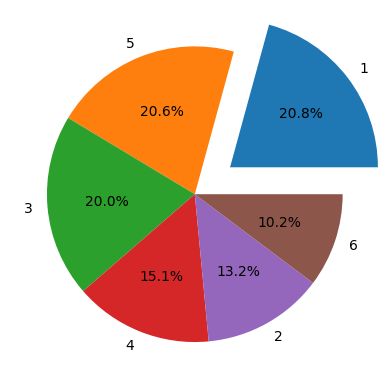

In [54]:
#piechart
gen=dfpk['Generation'].value_counts()
plt.pie(gen,labels=gen.index,autopct="%1.1f%%",explode=(0.3,0,0,0,0,0))